In [1]:
import numpy as np
import plotly.graph_objects as go
import h5py
import matplotlib.pyplot as plt

In [123]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8, 6)

In [7]:
box_sizes = np.arange(5, 36, 5)

data = h5py.File('../data/photos.hdf5')

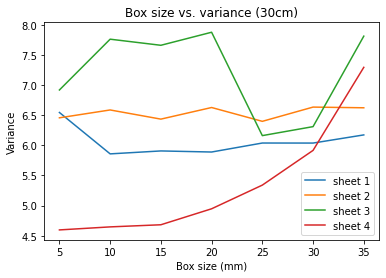

In [8]:
box_distance = '30cm'

plt.plot(box_sizes, data[box_distance]['1']['tow_camera']['blur'][:], label='sheet 1')
plt.plot(box_sizes, data[box_distance]['2']['tow_camera']['blur'][:], label='sheet 2')
plt.plot(box_sizes, data[box_distance]['3']['tow_camera']['blur'][:], label='sheet 3')
plt.plot(box_sizes, data[box_distance]['4']['tow_camera']['blur'][:], label='sheet 4')

plt.legend()


plt.xlabel('Box size (mm)')
plt.ylabel('Variance')
plt.title('Box size vs. variance ({})'.format(box_distance))
plt.savefig('box_variance_{}.png'.format(box_distance))

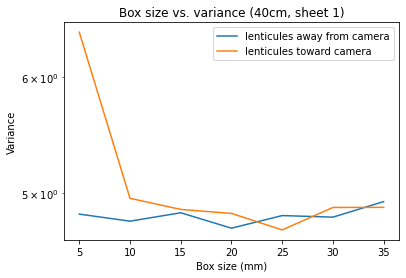

In [5]:
box_distance = '40cm'
sheet = '1'

plt.plot(box_sizes, data[box_distance][sheet]['away_camera']['blur'][:], label='lenticules away from camera')
plt.plot(box_sizes, data[box_distance][sheet]['tow_camera']['blur'][:], label='lenticules toward camera')

plt.legend()

plt.yscale('log')

plt.xlabel('Box size (mm)')
plt.ylabel('Variance')
plt.title('Box size vs. variance ({}, sheet {})'.format(box_distance, sheet))
plt.savefig('box_variance_{}.png'.format(box_distance))

Text(0.5, 1.0, 'Box size vs. variance (60, sheet 4)')

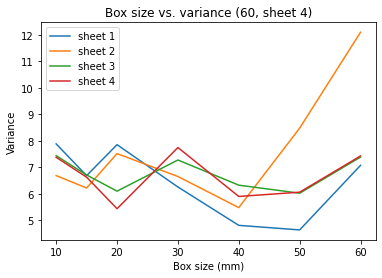

In [10]:
sheets = ['1', '2', '3', '4']
box_d = 0
box_distances = [10, 15, 20, 30, 40, 50, 60]

box_d_variance = {}

for sheet in sheets:
    box_d_variance[sheet] = np.zeros(len(box_distances))

    for i, box_distance in enumerate(box_distances):
        box_d_variance[sheet][i] = data['{}cm'.format(box_distance)][sheet]['away_camera']['blur'][box_d]

plt.plot(box_distances, box_d_variance['1'], label='sheet 1')
plt.plot(box_distances, box_d_variance['2'], label='sheet 2')
plt.plot(box_distances, box_d_variance['3'], label='sheet 3')
plt.plot(box_distances, box_d_variance['4'], label='sheet 4')


plt.legend()

# plt.yscale('log')

plt.xlabel('Box size (mm)')
plt.ylabel('Variance')
plt.title('Box size vs. variance ({}, sheet {})'.format(box_distance, sheet))
# plt.savefig('box_variance_{}.png'.format(box_distance))

In [39]:
data.close()